### Student Details

Student name: Tendai Dennis Chaka

Student ID: 20041829

## Part 1: Multi-class Linear SVM

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels 
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Print the scaled data
4. Train an instance of the scikitlearn sklearn.svm SVC (Support Vector Classifier) algorithm on the provided data
    1. You can use all the default parameters, except set the kernel to linear
5. Plot the decision boundary using the supplied plot_decision_boundary function

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('iris_data.csv', header=0)

# petal length and petal width
X = df.iloc[:, [2,3]].values
# Replace the strings with numeric labels (point 1 above)
y = df.iloc[:, 4].values
y = np.where(y == 'Iris-setosa', 0, np.where(y == 'Iris-versicolor', 1, 2))

Scaled X_train: [[ 0.99561074  0.8133907 ]
 [-1.28317134 -1.30849808]
 [ 0.76773253  0.8133907 ]
 [-1.39711044 -1.30849808]
 [ 0.48288477  0.41553655]
 [ 0.53985433  0.2829185 ]
 [ 1.62227581  1.21124485]
 [ 0.42591522  0.41553655]
 [ 1.1665194   1.3438629 ]
 [ 1.22348895  1.21124485]
 [ 0.88167164  0.94600875]
 [-1.16923223 -1.30849808]
 [-1.34014089 -1.30849808]
 [ 0.31197612  0.15030046]
 [ 1.67924537  1.3438629 ]
 [ 1.10954985  1.21124485]
 [ 1.05258029  0.8133907 ]
 [ 1.79318447  1.47648094]
 [ 0.08409791 -0.11493564]
 [-1.39711044 -1.30849808]
 [ 1.05258029  0.2829185 ]
 [-1.5680191  -1.30849808]
 [ 0.42591522  0.5481546 ]
 [ 1.05258029  1.21124485]
 [ 0.31197612  0.15030046]
 [-0.08681075  0.15030046]
 [ 0.93864119  1.47648094]
 [-1.34014089 -1.17588003]
 [ 0.48288477  0.15030046]
 [ 0.42591522  0.68077265]
 [-1.22620179 -0.77802589]
 [-1.28317134 -1.04326198]
 [ 1.1665194   0.5481546 ]
 [ 0.25500657  0.15030046]
 [-1.28317134 -1.44111613]
 [ 0.65379343  1.0786268 ]
 [ 0.1980370

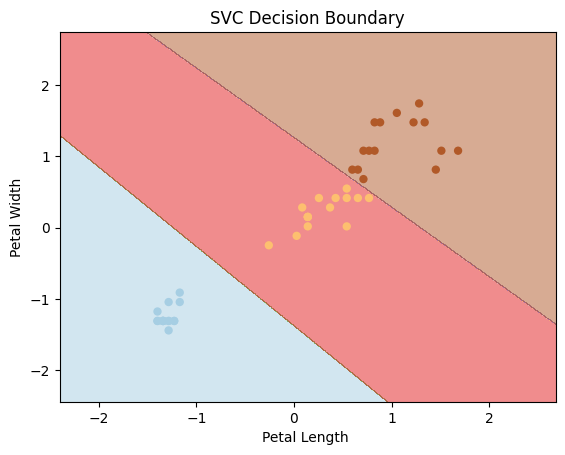

In [2]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=4)
################################


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

#Output scaled data
print("Scaled X_train:", X_train_scaled)
print("Scaled X_test:", X_test_scaled)

svc = SVC(kernel='linear')

svc.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = svc.predict(X_test_scaled)


def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)
    
    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)
    
    return fig, ax

plot_decision_boundary(X_test_scaled, y_pred, svc)

# Set axis labels and a title
plt.title('SVC Decision Boundary')
plt.xlabel('Petal Length ')
plt.ylabel('Petal Width')
plt.show()

# Show the plot
plt.show()



## Part 2: Investigating non-linear SVMs
Some problems are not linearly solvable, and SVMs offer a means of treating non-linear using kernels. The most used kernels are linear (i.e. no kernel, or what you implemented in the previous part) and Gaussian (or Radial Basis Function). 

You are provided with a randomised dataset that is clearly not linearly separable, and obviously we could not separate the examples from the two classes very well using any of the linear methods - Perceptron, logistic regression or linear SVM. 

1. Run an RBF (radial basis function, or Gaussian) kernel SVM model on the data  (choose a soft gamma value of 0.1) 
2. Plot the decision boundaries using the provided function
3. Change the gamma value to 100. What happens? What is the problem with this result? Describe what is happening based on the resources given in the activity.
4. Play around with the gamma value a bit to see how it changes

Note: the gamma parameter is related to the standard deviation of the Gaussian kernel, i.e. $\gamma = \frac{1}{2\sigma^2}$, or the similarity function 

\begin{equation}
\text{similarity}(x, l^{(i)}) = \exp\left(-\gamma||x - l^{(i)}||^2\right) = \exp\left(\frac{||x - l^{(i)}||^2}{2\sigma^2}\right)
\end{equation}

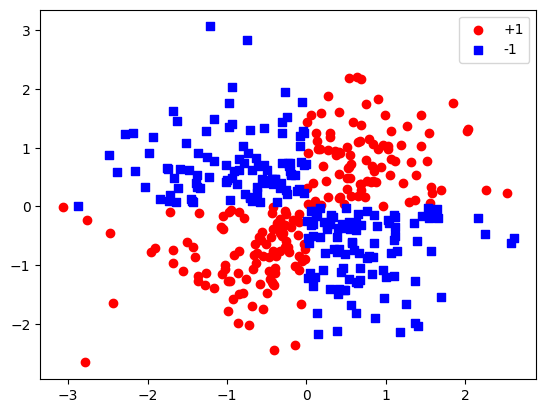

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X_r = np.random.randn(400,2)
y_r = np.where([x[0]*x[1] > 0 for x in X_r], 1, -1)

plt.scatter(X_r[y_r==1, 0],X_r[y_r==1, 1],c='r',marker='o',label='+1')
plt.scatter(X_r[y_r==-1, 0],X_r[y_r==-1, 1],c='b',marker='s',label='-1')
plt.legend()
plt.show()

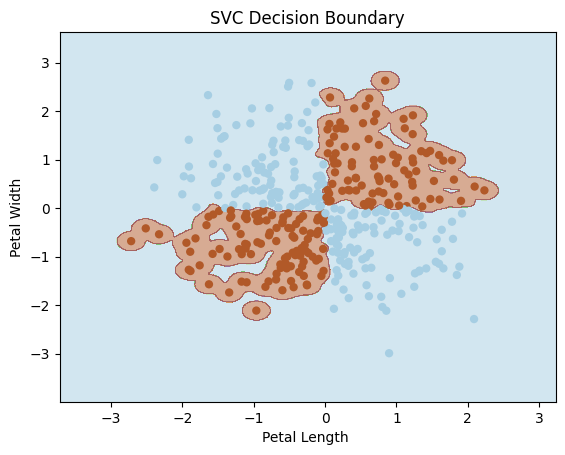

In [4]:
################################
#1
rbf_svm = SVC(kernel='rbf', gamma=100)
rbf_svm.fit(X_r, y_r)

#2
plot_decision_boundary(X_r, y_r, rbf_svm)

# Set axis labels and a title
plt.title('SVC Decision Boundary')
plt.xlabel('Petal Length ')
plt.ylabel('Petal Width')
plt.show()

# Show the plot
plt.show()




#### Q3 and Q4 After changing gamma value

An overfit model will result if the gamma value is set to 100. A decision boundary that essentially "wraps" around individual data points will be produced by the RBF kernel with such a high gamma value. This RBF kernel aims to categorise every training data point accurately, regardless of noise or outliers in the data. This amount of overfitting causes it to perform poorly on unseen data. The model's capacity to generalise to fresh, untried data is diminished by overfitting, which might be troublesome. When used to real-world scenarios or fresh datasets, the model may perform poorly because it becomes overly dependent on the training set.  Lower values like 0.5 result in a more flexible, less tightly fitting model.They results in a larger region of influence for each support vector, and the decision boundary is more flexible. While higher values like 100 result in a more tightly fitting, less flexible model.









## Part 3: Support Vector Machine for Network Intrusion Detection

We will use the NSL-KDD dataset to do a binary and multi-class classification. This dataset is quite large, and the training time can be quite long if you use the whole thing so that we will use just 20% of the dataset.

The data is already split into training and testing. It also contains a mix of different types of features - categorical, binary, and numerical features. In the Python Notebook, a breakdown of the different types of features is provided.

1. Provide a bar graph showing the breakdown of the number of different attack categories in the training set (1 or 0 for the binary classifier, multi: benign, dos, probe, r2l, u2r)
2. We cannot directly use categorical features in our support vector machine training. A piece of code is provided that handles the categorical features. Please describe what the pd.get_dummies() function call does, and why it helps. You may need to look up the documentation.
3. Apply the standard scaling to just the numeric features of the dataset (it does not make any sense to apply the scaler to binary features). Note, that you should still train on both the binary and the numeric features.
4. Binary SVM Classification: Train a linear classifier (with all default parameters except setting the kernel to linear) using the binary target variable (attack or not). Print the confusion_matrix and accuracy_score from sklearn.metrics. Briefly explain these two results.
5. Binary non-linear SVM: Train a non-linear classifier to see if you can beat the linear classifier. Set the kernel to rbf, and start with gamma=0.1. Print the confusion matrix and error. It might return an accuracy slightly higher than the linear SVM, but see if you can tweak the gamma parameter to get a better result. What gamma value gave you the best result? (when I was doing this, I got an accuracy of almost 0.78).
6. Multi-class SVM: Train a linear, multi-class SVM, and print the confusion matrix and the accuracy score. Discuss the results briefly.

#### Provided Code

The output of this piece of code is the following

`train_X`, `test_X` - the train and test set of features

`train_Y_bin`, `test_Y_bin` - the train and test target data for binary classification: 1 - attack, 0 - benign/normal

`train_Y_multi`, `test_Y_multi` - the train and test target variable data for multi-class: (`benign`, `dos`, `probe`, `r2l`, `u2r`)

`nominal_cols` - the names of the column headers that contain nominal/categorical data

`binary_cols` - the names of the column headers that contain binary data

`numeric_cols` - the names of the column headers that contain numerical data

In [1]:
####################
# CODE PROVIDED

# This code is a little bit complicated, and I don't want you to get bogged down in reading from csv files.
# This code reads from the CSV files, and creates the training and test sets for both binary and multi-class

# Read the data
import pandas as pd
test_df = pd.read_csv('KDDTest_CE4317.csv', header=0)
train_df = pd.read_csv('KDDTrain_CE4317.csv', header=0)

# Differentiating between nominal, binary, and numeric features
# Note, we only need to do this for the train data, as the train and test have the same feature names (of course)
col_names = train_df.columns.values    

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 19, 20]
numeric_idx = list(set(range(40)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()   # The columns that have nominal/categorical features
binary_cols = col_names[binary_idx].tolist()     # The columns that have binary features
numeric_cols = col_names[numeric_idx].tolist()   # The columns that have numerical features

train_Y_multi = train_df['attack_category']
train_Y_bin = train_df['attack_binary']
train_X_raw = train_df.drop(['attack_category','attack_binary'], axis=1)
test_Y_multi = test_df['attack_category']
test_Y_bin = test_df['attack_binary']
test_X_raw = test_df.drop(['attack_category','attack_binary'], axis=1)

# We have categorical/nominal variables here, but the SVM can't support such variables. So we need to convert them to numeric or binary.
combined_df_raw = pd.concat([train_X_raw, test_X_raw])  # Here we combine the features from the test and train datasets, ensuring that they have the same features after
# TASK: Explain what is happening here? Why do we need to do this?
combined_df = pd.get_dummies(combined_df_raw, columns=nominal_cols, drop_first=True)

train_X = combined_df[:len(train_X_raw)]
test_X = combined_df[len(train_X_raw):]

#### Explain the line marked with TASK above

The pd.get_dummies function converts categorical variable into dummy/indicator variables. For the categorical columns listed in nominal_cols in combined_df_raw DataFrame, the pd.get_dummies function will generate new binary columns (o or 1). Columns in the output are each named after a value; if the input is a DataFrame, the name of the original variable is prepended to the value.

#### Bar chart of attack categories

<Axes: ylabel='attack_category'>

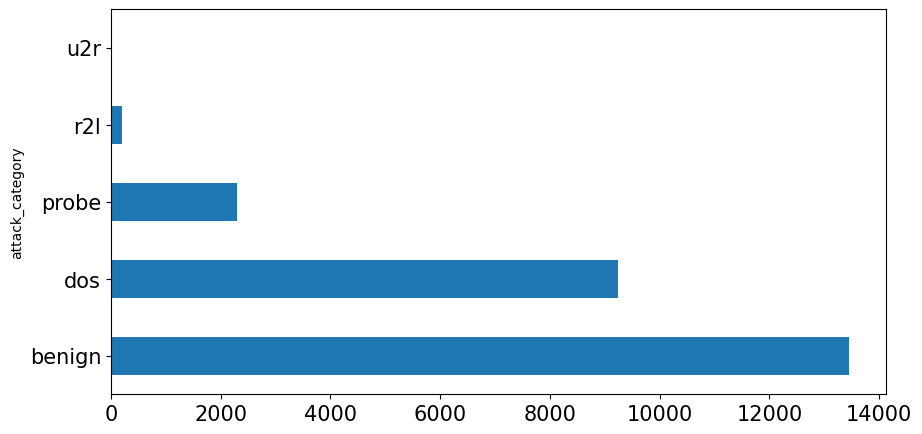

In [2]:
####################
#Q1
train_attack_cats = train_df['attack_category'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()
train_attack_cats.plot(kind='barh', figsize=(10,5), fontsize=15)


In [3]:
####################
# Q3
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
# Extract the numeric features from the combined dataset
numeric_features = combined_df[numeric_cols]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the numeric features of the training data
train_X_numeric_scaled = scaler.fit_transform(train_X[numeric_cols])

# Transform the numeric features of the test data using the same scaler
test_X_numeric_scaled = scaler.transform(test_X[numeric_cols])

print('Scale numeric train', train_X_numeric_scaled)
print('Scale numeric test', test_X_numeric_scaled)

Scale numeric train [[-0.11355066 -0.00988885 -0.03930979 ... -0.62736475 -0.22166806
  -0.37428075]
 [-0.11355066 -0.01003196 -0.03930979 ... -0.62736475 -0.38513984
  -0.37428075]
 [-0.11355066 -0.01009252 -0.03930979 ...  1.61445359 -0.38513984
  -0.37428075]
 ...
 [-0.11355066 -0.01009252 -0.03930979 ... -0.62736475  2.88429591
   2.77704096]
 [-0.11355066 -0.01009252 -0.03930979 ...  1.61445359 -0.38513984
  -0.37428075]
 [-0.11355066 -0.01009252 -0.03930979 ...  1.61445359 -0.38513984
  -0.37428075]]
Scale numeric test [[-0.11355066 -0.01009252 -0.03930979 ... -0.62736475  2.88429591
   2.77704096]
 [-0.11355066 -0.01009252 -0.03930979 ... -0.62736475  2.88429591
   2.77704096]
 [-0.1128062  -0.00470708 -0.03930979 ... -0.62736475 -0.38513984
  -0.37428075]
 ...
 [-0.11355066  0.01253107  0.05428582 ... -0.62736475 -0.15627934
  -0.15368823]
 [-0.11355066 -0.0100751  -0.03883697 ... -0.62736475 -0.38513984
  -0.37428075]
 [-0.11355066 -0.01009252 -0.03930979 ... -0.62736475  1.05

#### Binary classifier

In [6]:
####################
# Q4
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split


#train_X, test_X, train_Y_bin, test_Y_bin = train_test_split(train_X, train_Y_bin, test_size=0.9, random_state=4)

# linear SVM classifier
svm_binary_linear = SVC(kernel='linear')

svm_binary_linear.fit(train_X, train_Y_bin)

#Predictions on the test data
predictions = svm_binary_linear.predict(test_X)

# Calculate and print the confusion matrix
confusion = confusion_matrix(test_Y_bin, predictions)
print("Confusion Matrix:")
print(confusion)

# Calculate and print the accuracy score
accuracy = accuracy_score(test_Y_bin, predictions)
print("Accuracy Score:", accuracy)






Code kept running for hours, no output

#### Binary nonlinear classifier

In [13]:
####################
# Q5

# Use train_X, train_Y_bin, test_X, test_Y_bin here
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# Create and train the non-linear SVM classifier
svm_binary_nonlinear = SVC(kernel='rbf', gamma=0.000005)
svm_binary_nonlinear.fit(train_X, train_Y_bin)

# Predict the labels on the test data
predictions = svm_binary_nonlinear.predict(test_X)

#Confusion matrix
confusion = confusion_matrix(test_Y_bin, predictions)
print("Confusion Matrix:")
print(confusion)

#Accuracy and error rate
accuracy_rate =  accuracy_score(test_Y_bin, predictions)
error_rate  = 1 - accuracy_rate
print(f"Accuracy Rate:", accuracy_rate)
print(f"Error Rate:", error_rate)


Confusion Matrix:
[[9335  376]
 [4424 8409]]
Accuracy Rate: 0.78708303761533
Error Rate: 0.21291696238466995


Gamma of 0.000005 gave me the best result

#### Multi-class linear classifier

In [4]:
####################
#Q6

# Use train_X, train_Y_multi, test_X, test_Y_multi here
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# Train a linear, multi-class SVM
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(train_X, train_Y_multi)

# Make predictions on the test data
predictions = svm_classifier.predict(test_X)

# Calculate the confusion matrix
confusion = confusion_matrix(test_Y_multi, predictions)

# Calculate the accuracy score
accuracy = accuracy_score(test_Y_multi, predictions)

print("Confusion Matrix:")
print(confusion)
print("Accuracy Score:", accuracy)



Code kept running for hours, no output